In [68]:
# http://iamtrask.github.io/2015/07/12/basic-python-network/
# Данная сеть предназначена для решения достаточно простой задачи
# использовать данные на входе для предсказания значения на выходе
# данная задача чуть посложнее, нет прямого совпадения 
# между входом и выходом
# Inputs 	Output
# 0 0 1 	0
# 0 1 1 	1
# 1 0 1 	1
# 1 1 1 	0
# для решения данной проблемы, 
# мы будем добавлятьдополнительный внутренний слой
#для построения графиков внутри notebook'a
%pylab inline 
import pylab as pl # библиотека для построения графиков
import numpy as np # библиотека для осуществления вычислений

Populating the interactive namespace from numpy and matplotlib


In [69]:
# sigmoid function - или функция активации нейронов
def sigmoid(x,deriv=False): 
    if(deriv==True): # если истина  - то нам нужна производная
        return x*(1-x) # возвращаем производную функции
    return 1/(1+np.exp(-x)) # возвращаем функцию

In [70]:
# для примера построим график функции
tmpX = np.arange(-5,5,0.1) 

In [71]:
tmpY = sigmoid(tmpX)

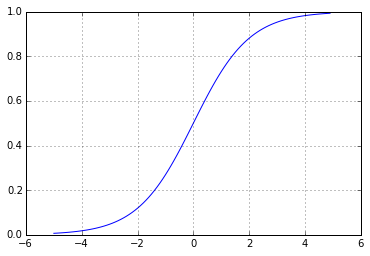

In [72]:
pl.plot(tmpX,tmpY)
plt.grid()

In [73]:
# Входные данные 3 входа и 4 примера
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
print(X)
print(X.shape)

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
(4, 3)


In [74]:
# Выходные данные - 1 выход и 4 примера.
y = np.array([[0],
			[1],
			[1],
			[0]])
print(y)
print(y.shape)

[[0]
 [1]
 [1]
 [0]]
(4, 1)


In [75]:
# При генерации случаных чисел
# использовать детерминированный подход, т.е.
# при каждом запуске будут генерироваться 
# по одним и тем же правилам
np.random.seed(1)

In [76]:
# генерируем "синапсы" - веса связи между нейронами
# у нас 3 входа, внутренний слой состоит из 4х элеметнов
# это внутренний слой - размер 4х1
syn1 = 2*np.random.random((4,1)) - 1
# а вот связей надо 3х4, чтобы создать полносвязную сеть
syn0 = 2*np.random.random((3,4)) - 1

print(syn1)
print(syn1.shape)
print(syn0)
print(syn0.shape)

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]
 [-0.39533485]]
(4, 1)
[[-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]
 [-0.5910955   0.75623487 -0.94522481  0.34093502]]
(3, 4)


In [77]:
errors=np.array([])
numJ =np.array([])
for j in range(60000):
# forward propagation
    # Загружаем сразу все тренировочные примеры
    # на 0 - входной слой
    l0 = X
    
    # Умножаем вход на веса
    # это и есть попытка "предсказать значение" для внутреннего слоя
    # l0 - матрица 4x3 syn0 - 3x4
    # при перемножении - размерность в середине должна совпадать 4х3 * 3х4 = 4х4    
    l1 = sigmoid(np.dot(l0,syn0))
    
    # а теперь обучим слой 2 - выходной, подав на него значений нейронов слоя 
    # 4x4 - 4x1 = 4x1 - обучение для всех тренировочных примеров
    l2 = sigmoid(np.dot(l1,syn1))
    
    
    # сравниваем с ожидаемым результатом
    # и сохраняем ошибку (4x1)
    l2_error = y - l2
    
    # формируем массив - номер обучения
    # и средняя ошибка и все веса
    # это для порсотра режима обучения
    if (j%10==0):
        numJ=np.append(numJ,j)
        errors=np.append(errors,np.mean(np.abs(l2_error)))
        # print(syn0)
        
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    # вычисляем разницу, но умножая ошибку 
    # на производную функции активации 
    l2_delta = l2_error*sigmoid(l2,deriv=True)
    
    # Распространяем ошибку в обратную сторнону
    l1_error = l2_delta.dot(syn1.T)
    
    # также вычисляем дельту
    l1_delta = l1_error * sigmoid(l1,deriv=True)

    # Обновляем значения весов
    # Самая главная часть 
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

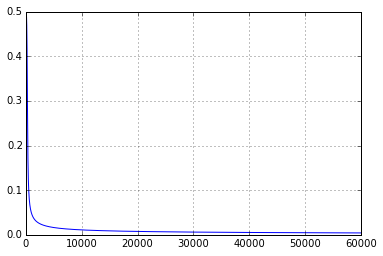

In [78]:
#Нарисуем кривую изменения ошибки
#print(numJ)
#print(errors)
pl.plot(numJ,errors)
pl.grid()

In [82]:
print ("Output After Training:")
print (l2)
print('Synapse')
print(syn1)

print ("Output After Training:")
print (l1)
print('Synapse')
print(syn0)

Output After Training:
[[ 0.00398427]
 [ 0.99459406]
 [ 0.99763821]
 [ 0.00513251]]
Synapse
[[ -0.19380964]
 [ 11.79371668]
 [-12.45383901]
 [ -5.98412096]]
Output After Training:
[[  3.35235582e-01   9.99636668e-01   9.49916692e-01   9.05022709e-01]
 [  2.24443001e-01   9.64994131e-01   1.28563255e-02   9.96372668e-01]
 [  1.88031800e-01   8.38134847e-01   3.59894145e-02   5.60499351e-01]
 [  1.17304149e-01   4.93218201e-02   2.56345572e-05   9.73519021e-01]]
Synapse
[[-0.77825051 -6.2754209  -6.23056634 -2.01113749]
 [-0.55536094 -4.60322734 -7.28367075  3.36130517]
 [-0.68459914  7.91983664  2.9426889   2.25432556]]


In [83]:
# попробуем проверить - должно получится значение близкое к 0
testIn = np.array([1,1,1])
testOut = sigmoid(np.dot(testIn,syn0))
testOut = sigmoid(np.dot(testOut,syn1))
print(testOut[0])
# результат округляем
print(round(testOut[0]))

0.00513246395836
0.0


In [84]:
# попробуем проверить - должно получится значение близкое к 1
testIn = np.array([0,1,1])
testOut = sigmoid(np.dot(testIn,syn0))
testOut = sigmoid(np.dot(testOut,syn1))
print(testOut[0])
# результат округляем
print(round(testOut[0]))

0.994594103431
1.0
